## Импортируем модули для работы с данными

In [387]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.bool = np.bool_

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score

Считаем датасет

In [388]:
df_titanic = pd.read_csv('train.csv')

## Выведем основную информацию о датасете: информацию о типах данных, число пропусков, средние значения и т.д.

Выведем 5 первых строчек из датасета

In [389]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [390]:
df_titanic.shape

(891, 12)

In [391]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [392]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Сохраним и выведем все колонки которые относятся к числовому типу

In [393]:
numeric_cols = df_titanic.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


Сохраним и выведем все не числовые колонки

In [394]:
non_numeric_cols = df_titanic.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


Проверим на пропуски данных

<Axes: >

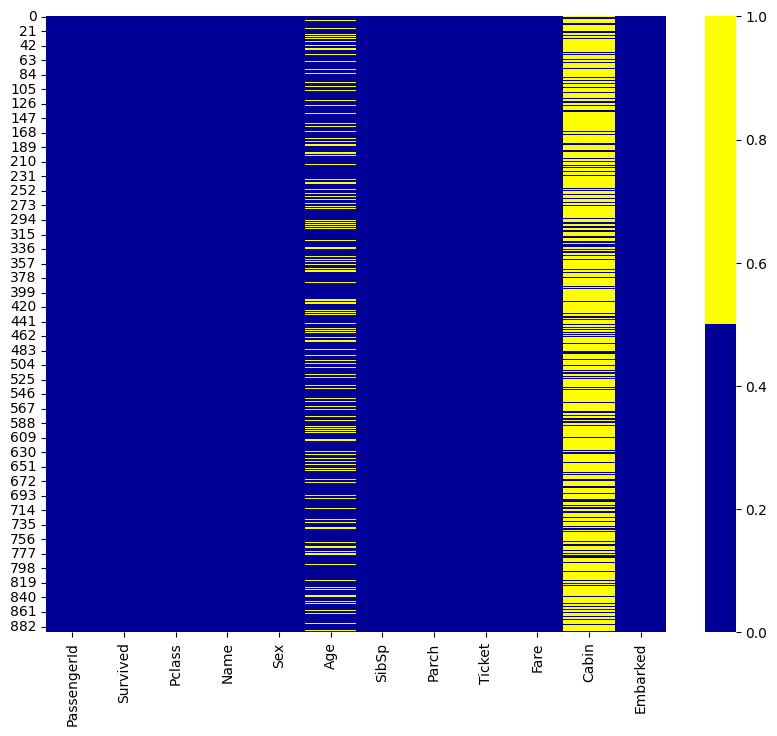

In [395]:
plt.figure(figsize=(10,8))

cols = df_titanic.columns[:30]
colours = ['#000099', '#ffff00']
sns.heatmap(df_titanic[cols].isna(), cmap=sns.color_palette(colours))

In [396]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Заменим все пропуски в данных для числовых данных - медианой, для не числовых данных 'NA' (нет данных)

In [397]:
def check_pass_obj(df):
    if isinstance(df, pd.DataFrame):
        return True
    else:
        return False
    

def change_missing_values_non_numeric_by_const(df, cols_to_fill):
    if check_pass_obj(df):
        for col in cols_to_fill:
            if col == 'Cabin':
                df[col] = df[col].fillna('NO CABIN')
            else:
                df[col] = df[col].fillna('NA')
    else:
        raise TypeError("Data must be a Pandas DataFrame")
    

def change_missing_values_numeric_by_const(df, cols_to_fill):
    if check_pass_obj(df):
        for col in cols_to_fill:
            med = df[col].median()
            df[col] = df[col].fillna(med)
    else:
        raise TypeError("Data must be a Pandas DataFrame")
    

lst_numeric_for_fill = []
lst_non_numeric_for_fill = []

lst_input = ['Age',
            'Cabin',
            'Embarked']

for col in lst_input:
    if col in non_numeric_cols:
        lst_non_numeric_for_fill.append(col)
    if col in numeric_cols:
        lst_numeric_for_fill.append(col)
    if len(lst_non_numeric_for_fill) > 0:
        change_missing_values_non_numeric_by_const(df_titanic, lst_non_numeric_for_fill)
        change_missing_values_non_numeric_by_const(df_titanic, lst_non_numeric_for_fill)
    if len(lst_numeric_for_fill) > 0:
        change_missing_values_numeric_by_const(df_titanic, lst_numeric_for_fill)
        change_missing_values_numeric_by_const(df_titanic, lst_numeric_for_fill)

In [398]:
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Применим One-Hot Encoding для категориального признака

In [399]:
ohe = OneHotEncoder()
res = ohe.fit_transform(df_titanic["Sex"].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(res.toarray(), columns=ohe.get_feature_names_out())
ohe_df.head()

,x0_female,x0_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


Удалим старый столбец пола и добавим новые столбцы

In [400]:
df_titanic = pd.concat([df_titanic, ohe_df], axis=1).drop(columns='Sex')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,x0_female,x0_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NO CABIN,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NO CABIN,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NO CABIN,S,0.0,1.0


Отобразим корреляцию между признаками это нам позволит найти коллинеарность между признаками, а в некоторых случаях позволит удалить признак из-за того что он не оказывает влияние на целевой признак

<Axes: >

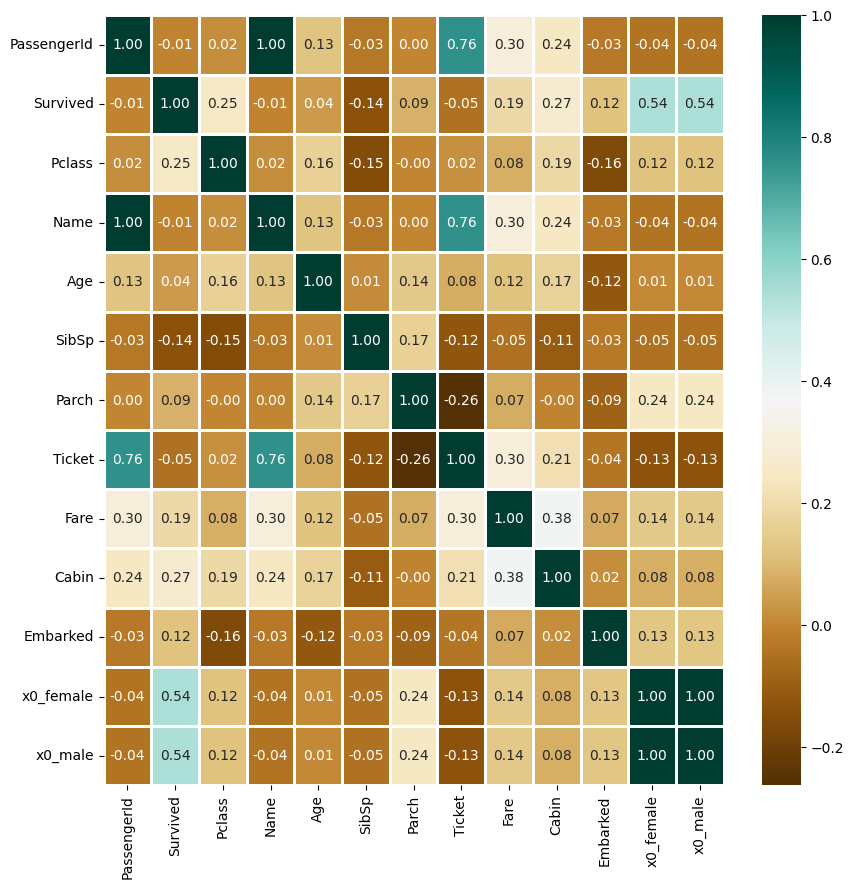

In [401]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_titanic.apply(lambda x: x.factorize()[0]).corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

По графику видно, что можно удалить из датасета признаки которые не оказывают на признак Выживаемости это - PassengerId, Name, Ticket

In [402]:
df_titanic = df_titanic.drop(columns=['PassengerId','Name','Ticket'])

In [403]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,x0_female,x0_male
0,0,3,22.0,1,0,7.2500,NO CABIN,S,0.0,1.0
1,1,1,38.0,1,0,71.2833,C85,C,1.0,0.0
2,1,3,26.0,0,0,7.9250,NO CABIN,S,1.0,0.0
3,1,1,35.0,1,0,53.1000,C123,S,1.0,0.0
4,0,3,35.0,0,0,8.0500,NO CABIN,S,0.0,1.0


In [404]:
res_emb = ohe.fit_transform(df_titanic["Embarked"].to_numpy().reshape(-1, 1))
ohe_df_emb = pd.DataFrame(res_emb.toarray(), columns=ohe.get_feature_names_out())
ohe_df_emb.head()

,x0_C,x0_NA,x0_Q,x0_S
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [405]:
df_titanic = pd.concat([df_titanic, ohe_df_emb], axis=1).drop(columns='Embarked')
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,x0_female,x0_male,x0_C,x0_NA,x0_Q,x0_S
0,0,3,22.0,1,0,7.2500,NO CABIN,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,C85,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,NO CABIN,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,C123,1.0,0.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,NO CABIN,0.0,1.0,0.0,0.0,0.0,1.0


In [406]:
df_titanic = df_titanic.drop(columns=['x0_NA'])

In [407]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,x0_female,x0_male,x0_C,x0_Q,x0_S
0,0,3,22.0,1,0,7.2500,NO CABIN,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,C85,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,NO CABIN,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,C123,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,NO CABIN,0.0,1.0,0.0,0.0,1.0


In [408]:
df_titanic['Cabin'] = np.where(df_titanic['Cabin'] == 'NO CABIN', 0, 1)

In [409]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,x0_female,x0_male,x0_C,x0_Q,x0_S
0,0,3,22.0,1,0,7.2500,0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0,0.0,1.0,0.0,0.0,1.0


Проверим на мультиколлинеарность

In [410]:
corrs = df_titanic.corr()
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool))
upper_tri

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,x0_female,x0_male,x0_C,x0_Q,x0_S
Survived,NaN,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.316912,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,NaN,NaN,-0.339898,0.083081,0.018443,-0.549500,-0.725541,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,NaN,NaN,NaN,-0.233296,-0.172482,0.096688,0.240314,-0.081163,0.081163,0.030248,-0.031415,-0.014665
SibSp,NaN,NaN,NaN,NaN,0.414838,0.159651,-0.040460,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,NaN,NaN,NaN,NaN,NaN,0.216225,0.036987,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,NaN,NaN,NaN,NaN,NaN,NaN,0.482075,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140391,-0.140391,0.208528,-0.129572,-0.110087
x0_female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,0.082853,0.074115,-0.125722
x0_male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.082853,-0.074115,0.125722
x0_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.148258,-0.778359


Отобразим в виде графика

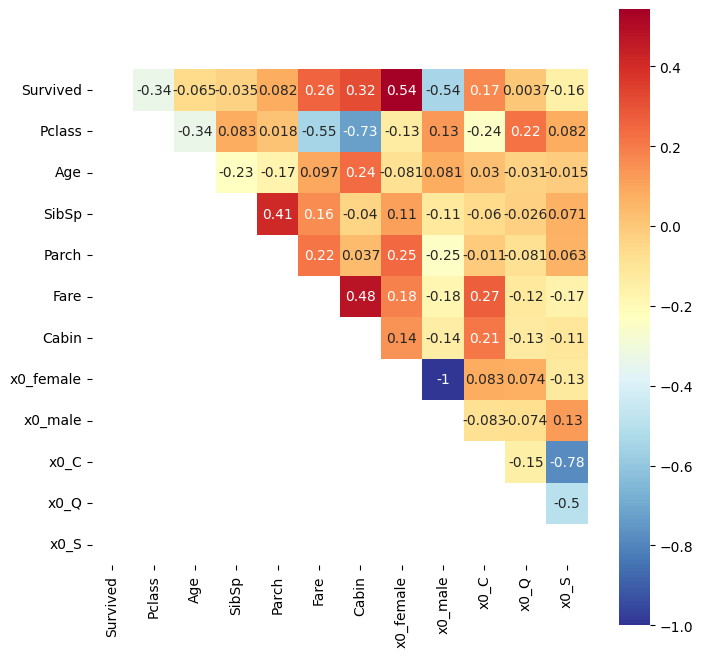

In [411]:
plt.figure(figsize=(8, 8))
sns.heatmap(upper_tri, cmap="RdYlBu_r", square=True, annot=True);

Эмпирический порог 0.95. Из графика все признаки не превышают порог, оставляем как есть. 

## Произведем разбиение датасета на тренировочную/тестовую выборки

Эта задача классификации, где нужно предсказать дескретную переменную "Survived" Выжил/Не выжил.

In [412]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,x0_female,x0_male,x0_C,x0_Q,x0_S
0,0,3,22.0,1,0,7.2500,0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0,0.0,1.0,0.0,0.0,1.0


In [413]:
y = df_titanic["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [414]:
X = df_titanic.drop(columns='Survived')

In [415]:
X

,Pclass,Age,SibSp,Parch,Fare,Cabin,x0_female,x0_male,x0_C,x0_Q,x0_S
0,3,22.0,1,0,7.2500,0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0.0,1.0,0.0,0.0,1.0
887,1,19.0,0,0,30.0000,1,1.0,0.0,0.0,0.0,1.0
888,3,28.0,1,2,23.4500,0,1.0,0.0,0.0,0.0,1.0
889,1,26.0,0,0,30.0000,1,0.0,1.0,1.0,0.0,0.0


In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2024, test_size=0.25)

DummyClassifier - baseline

In [417]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [418]:
y_pred_dummy = dummy_clf.predict(X_test)
accuracy_score(y_test, y_pred_dummy)

0.5964125560538116

In [419]:
confusion_matrix(y_test, y_pred_dummy)

array([[133,   0],
       [ 90,   0]])

Логистическая регрессия

In [420]:
log_req = LogisticRegression()
log_req.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [421]:
y_preds_log_req = log_req.predict(X_test)

Выберем метрику для оценки качество обученной модели, accuracy нам не подойдет так как у нас по-моему мнению существует дисбаланс искомого класса, метрика Полнота и Точность более точно описывает качество модели, две другие f1-score и roc_auc_score являются производными от Полноты и Точности.

In [422]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy, zero_division=0)}')
print(f'Precision for Logistic regression: {precision_score(y_test, y_preds_log_req, zero_division=0)}')

Precision for Dummy Classificator: 0.0
Precision for Logistic regression: 0.7444444444444445


Процент объектов первого класса среди найденных равен 0.74, а также больше чем Dummy Classificator, что является приемлемым показателем

In [423]:
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')
print(f'Recall for Logistic regression: {recall_score(y_test, y_preds_log_req)}')

Recall for Dummy Classificator: 0.0
Recall for Logistic regression: 0.7444444444444445


Процент найденных объектов первого класса равен 0.74, а также больше чем Dummy Classificator, что является приемлемым показателем

Далее интересно было вывести показатели других метрик 

In [424]:
accuracy_score(y_test, y_preds_log_req)

0.7937219730941704

In [425]:
confusion_matrix(y_test, y_preds_log_req)

array([[110,  23],
       [ 23,  67]])

In [426]:
print(f'F1-score for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')
print(f'F1-score for Logistic regression: {f1_score(y_test, y_preds_log_req)}')

F1-score for Dummy Classificator: 0.0
F1-score for Logistic regression: 0.7444444444444445


In [427]:
print(classification_report(y_test, y_preds_log_req))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       133
           1       0.74      0.74      0.74        90

    accuracy                           0.79       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.79      0.79      0.79       223



In [428]:
roc_auc_score(y_test, y_preds_log_req)

0.7857560568086884

Проведем масштабирование 

<Axes: title={'center': 'Age KDE'}, ylabel='Density'>

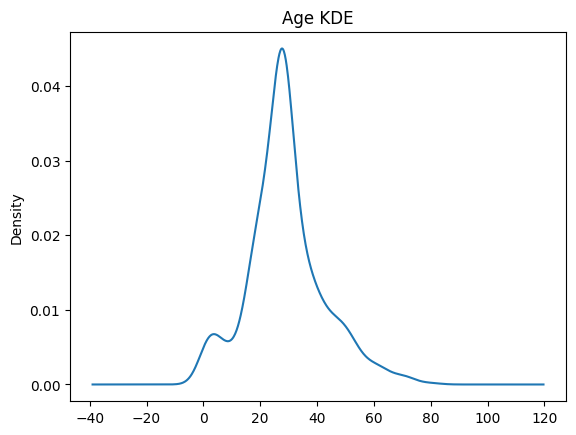

In [429]:
X_train['Age'].plot.kde(title='Age KDE')

In [430]:
scaler = StandardScaler()
X_train_scaler = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaler = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

<Axes: title={'center': 'Age KDE'}, ylabel='Density'>

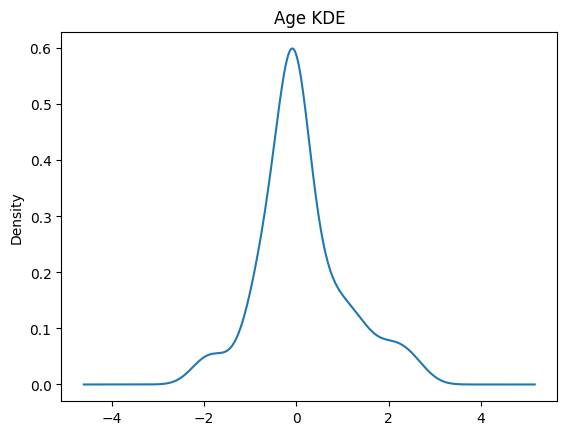

In [431]:
X_test_scaler['Age'].plot.kde(title='Age KDE')

Переобучим модель

In [432]:
lr = LogisticRegression()
lr.fit(X_train_scaler, y_train)
y_preds_lr = log_req.predict(X_test_scaler)

In [433]:
print(classification_report(y_test, y_preds_lr))

              precision    recall  f1-score   support

           0       0.88      0.62      0.73       133
           1       0.61      0.88      0.72        90

    accuracy                           0.72       223
   macro avg       0.74      0.75      0.72       223
weighted avg       0.77      0.72      0.72       223



Проведем интерпритацию

In [434]:
lr.coef_

array([[-0.78581722, -0.56606826, -0.34548902,  0.00995025,  0.00723815,
         0.21789123,  0.63004999, -0.63004999,  0.07529422,  0.06861936,
        -0.1091171 ]])

In [435]:
X_train_scaler.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'x0_female',
       'x0_male', 'x0_C', 'x0_Q', 'x0_S'],
      dtype='object')

In [436]:
def plotCoefficients(model, columns):
    coefs = pd.DataFrame(model.coef_[0], columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

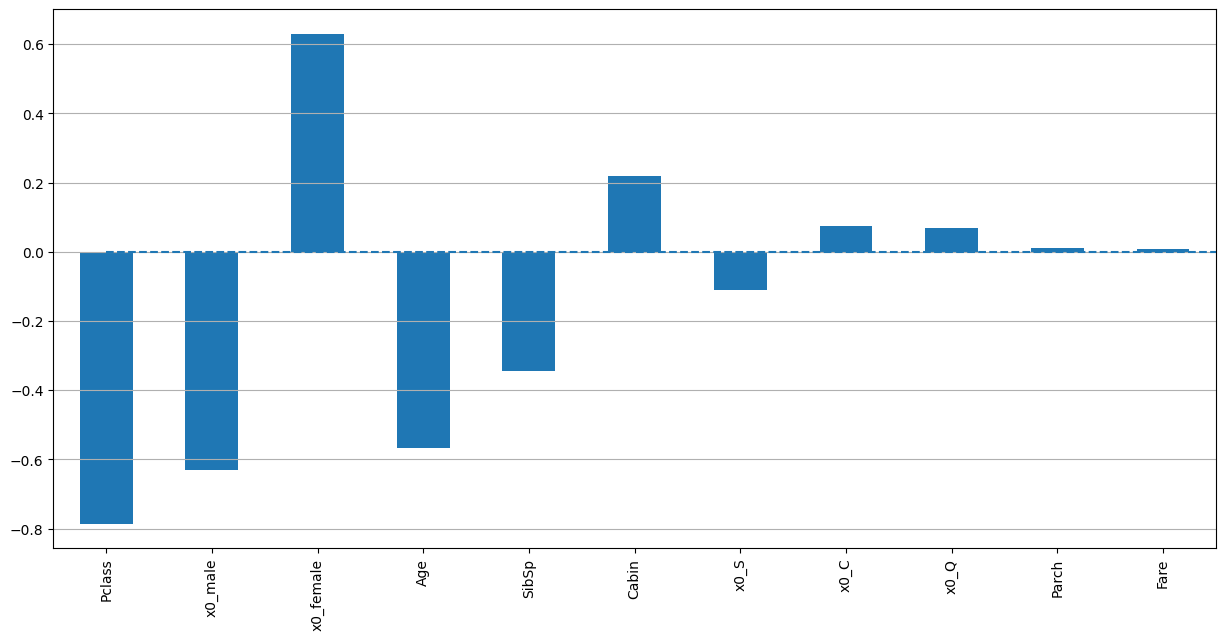

In [437]:
plotCoefficients(lr, X_train_scaler.columns)

Из графика видно - (по степени важности) Пассажирский класс, Пол мужской, Возраст, Количество родственников, Порт посадки (Саутгемптон) оказывает отрицательное влияние на выживаемость, а Пол женский, Наличие кабины, Порт посадки (Шербур), Порт посадки (Квинстаун) и в меньшей степени Количество родителей/детей и Стоимость билета оказывают положительное влияние на выживаемость